In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
data=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.columns=['labels','data']

In [10]:
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data['b_lables']=data['labels'].map({'ham':0,'spam':1})
data.head()

,labels,data,lables,b_lables
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [17]:
data.drop(['lables'],axis='columns',inplace=True)

In [18]:
data.head()

,data,b_lables
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
X=data['data']
Y=data['b_lables']

## Using CountVectorizer

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [32]:
from sklearn.naive_bayes import MultinomialNB
pipe1=Pipeline([('vectorizer',CountVectorizer(decode_error='ignore')),('nb',MultinomialNB())])

In [33]:
cross_val_score(pipe1,X,Y)

array([0.98654709, 0.98654709, 0.98473968, 0.98294434, 0.98563734])

In [34]:
pipe2=Pipeline([('vectorizer',TfidfVectorizer(decode_error='ignore')),('nb',MultinomialNB())])

In [35]:
cross_val_score(pipe2,X,Y)

array([0.96143498, 0.95515695, 0.95780969, 0.9551167 , 0.96050269])

In [36]:
vec=CountVectorizer(decode_error='ignore')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
x_train_mod=vec.fit_transform(x_train)

In [39]:
model=MultinomialNB()
model.fit(x_train_mod,y_train)

MultinomialNB()

In [40]:
model.score(vec.transform(x_test),y_test)

0.9832535885167464

In [78]:
str=["free"]
model.predict(vec.transform(str))

array([1])

In [47]:
#pipe1.fit(x_test,y_test)
#pipe1.predict(str)

In [48]:
data.head()

,data,b_lables
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### Visualization

In [83]:
from wordcloud import WordCloud
import  matplotlib.pyplot as plt
def visualize(label):
  words=''
  for msg in data[data['b_lables']== label ]['data']:
        words+=msg + ' '
  wc=WordCloud(width=700,height=500).generate(words)
  plt.imshow(wc)
  plt.axis('off')
  plt.show()  
    

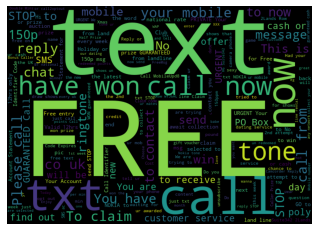

In [84]:
visualize(1)

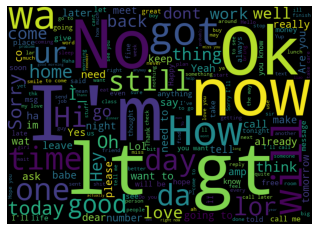

In [85]:
visualize(0)

In [ ]:
emails=[
    'ok i have got it now',
    'get free text'
       ]
model.predict(vec.transform(emails))